In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
#load the dataset
df=pd.read_csv("D:/campus_placement/notebooks/data/placement_train.csv")

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [21]:
df.shape

(215, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df["salary"]=df["salary"].fillna(df["salary"].mean())

In [8]:
df.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [9]:
#check datatypes
df.dtypes

sl_no               int64
gender              int64
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [10]:
df.set_index('sl_no',inplace=True)

In [11]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000


In [23]:
df.duplicated().sum()

0

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,215.0,0.353488,0.479168,0.00,0.000,0.000000,1.000000,1.00
ssc_p,215.0,67.303395,10.827205,40.89,60.600,67.000000,75.700000,89.40
hsc_p,215.0,66.333163,10.897509,37.00,60.900,65.000000,73.000000,97.70
degree_p,215.0,66.370186,7.358743,50.00,61.000,66.000000,72.000000,91.00
etest_p,215.0,72.100558,13.275956,50.00,60.000,71.000000,83.500000,98.00
mba_p,215.0,62.278186,5.833385,51.21,57.945,62.000000,66.255000,77.89
salary,215.0,288655.405405,77457.900102,200000.00,250000.000,288655.405405,288655.405405,940000.00


In [14]:
numerical_columns=df.columns[df.dtypes!="object"]

In [15]:
numerical_columns

Index(['gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'], dtype='object')

In [ ]:
#Data Visualization

<Axes: >

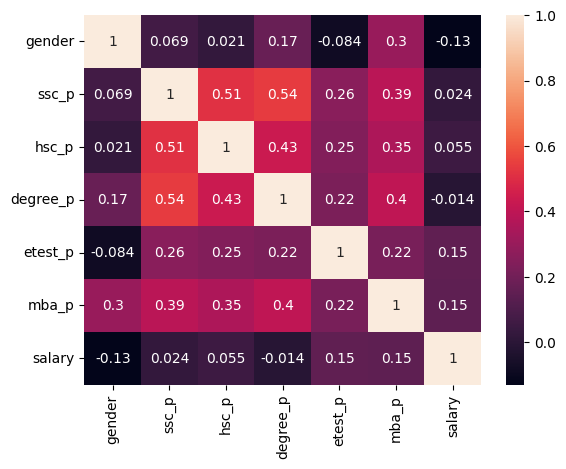

In [17]:
#heatmap
import seaborn as sns
sns.heatmap(df[numerical_columns].corr(),annot=True)

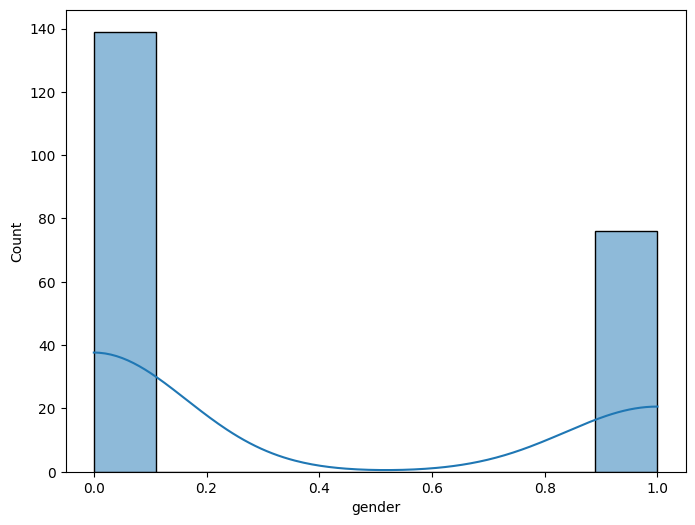

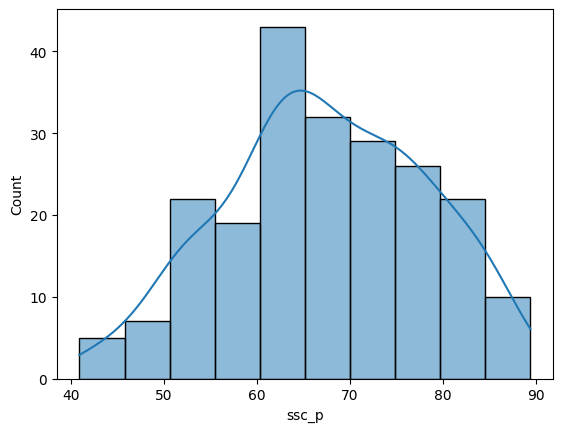

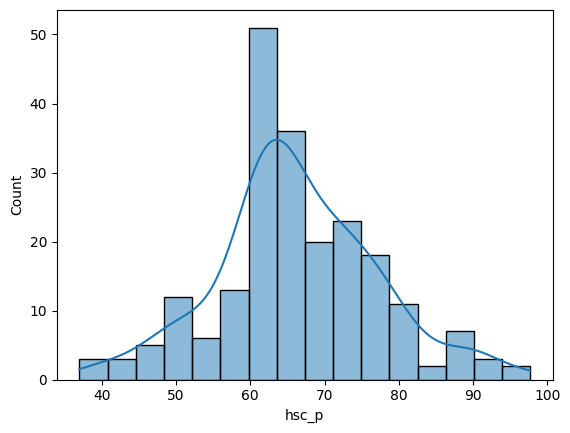

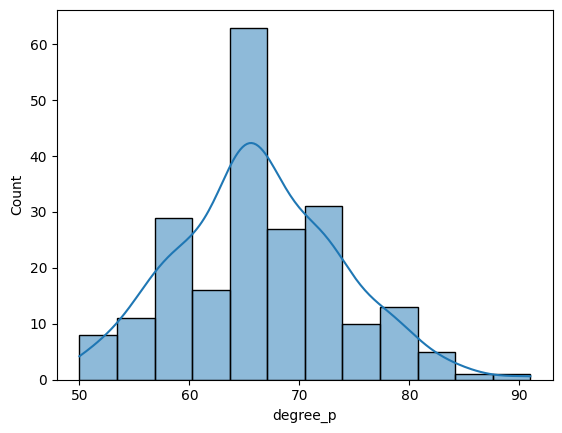

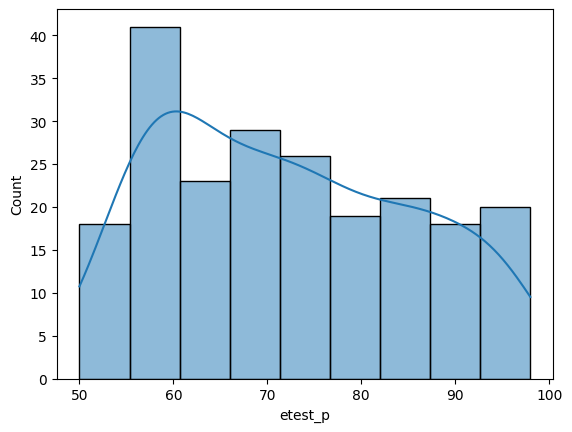

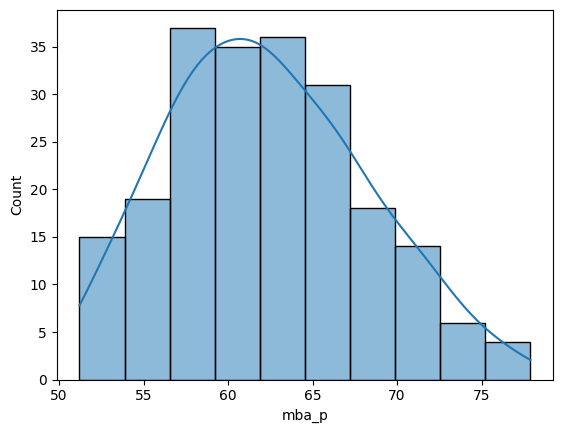

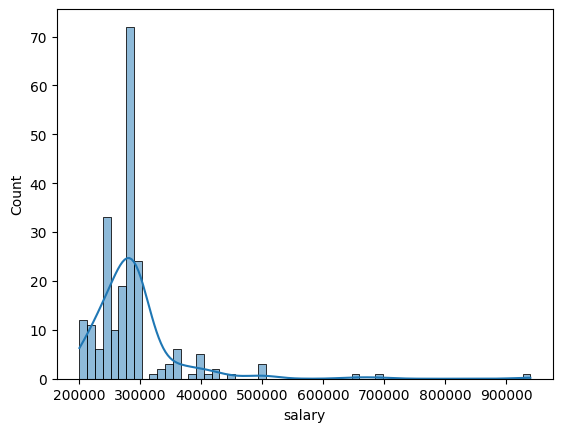

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

for col in numerical_columns:
    sns.histplot(data=df,x=col,kde=True)    #kde means kernal density estimation
    print("\n")
    plt.show()

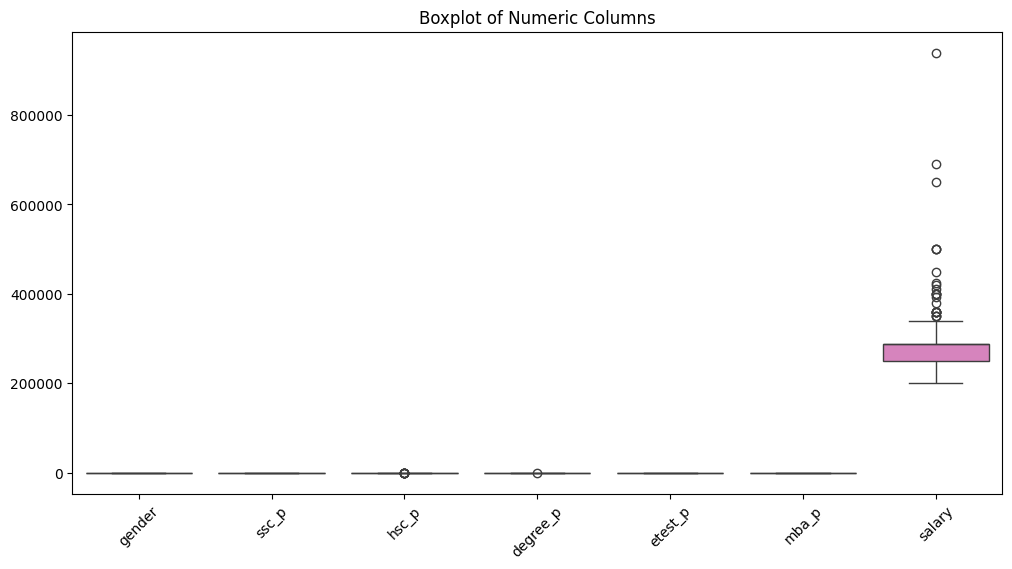

In [19]:
# Creating a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45)
plt.show()


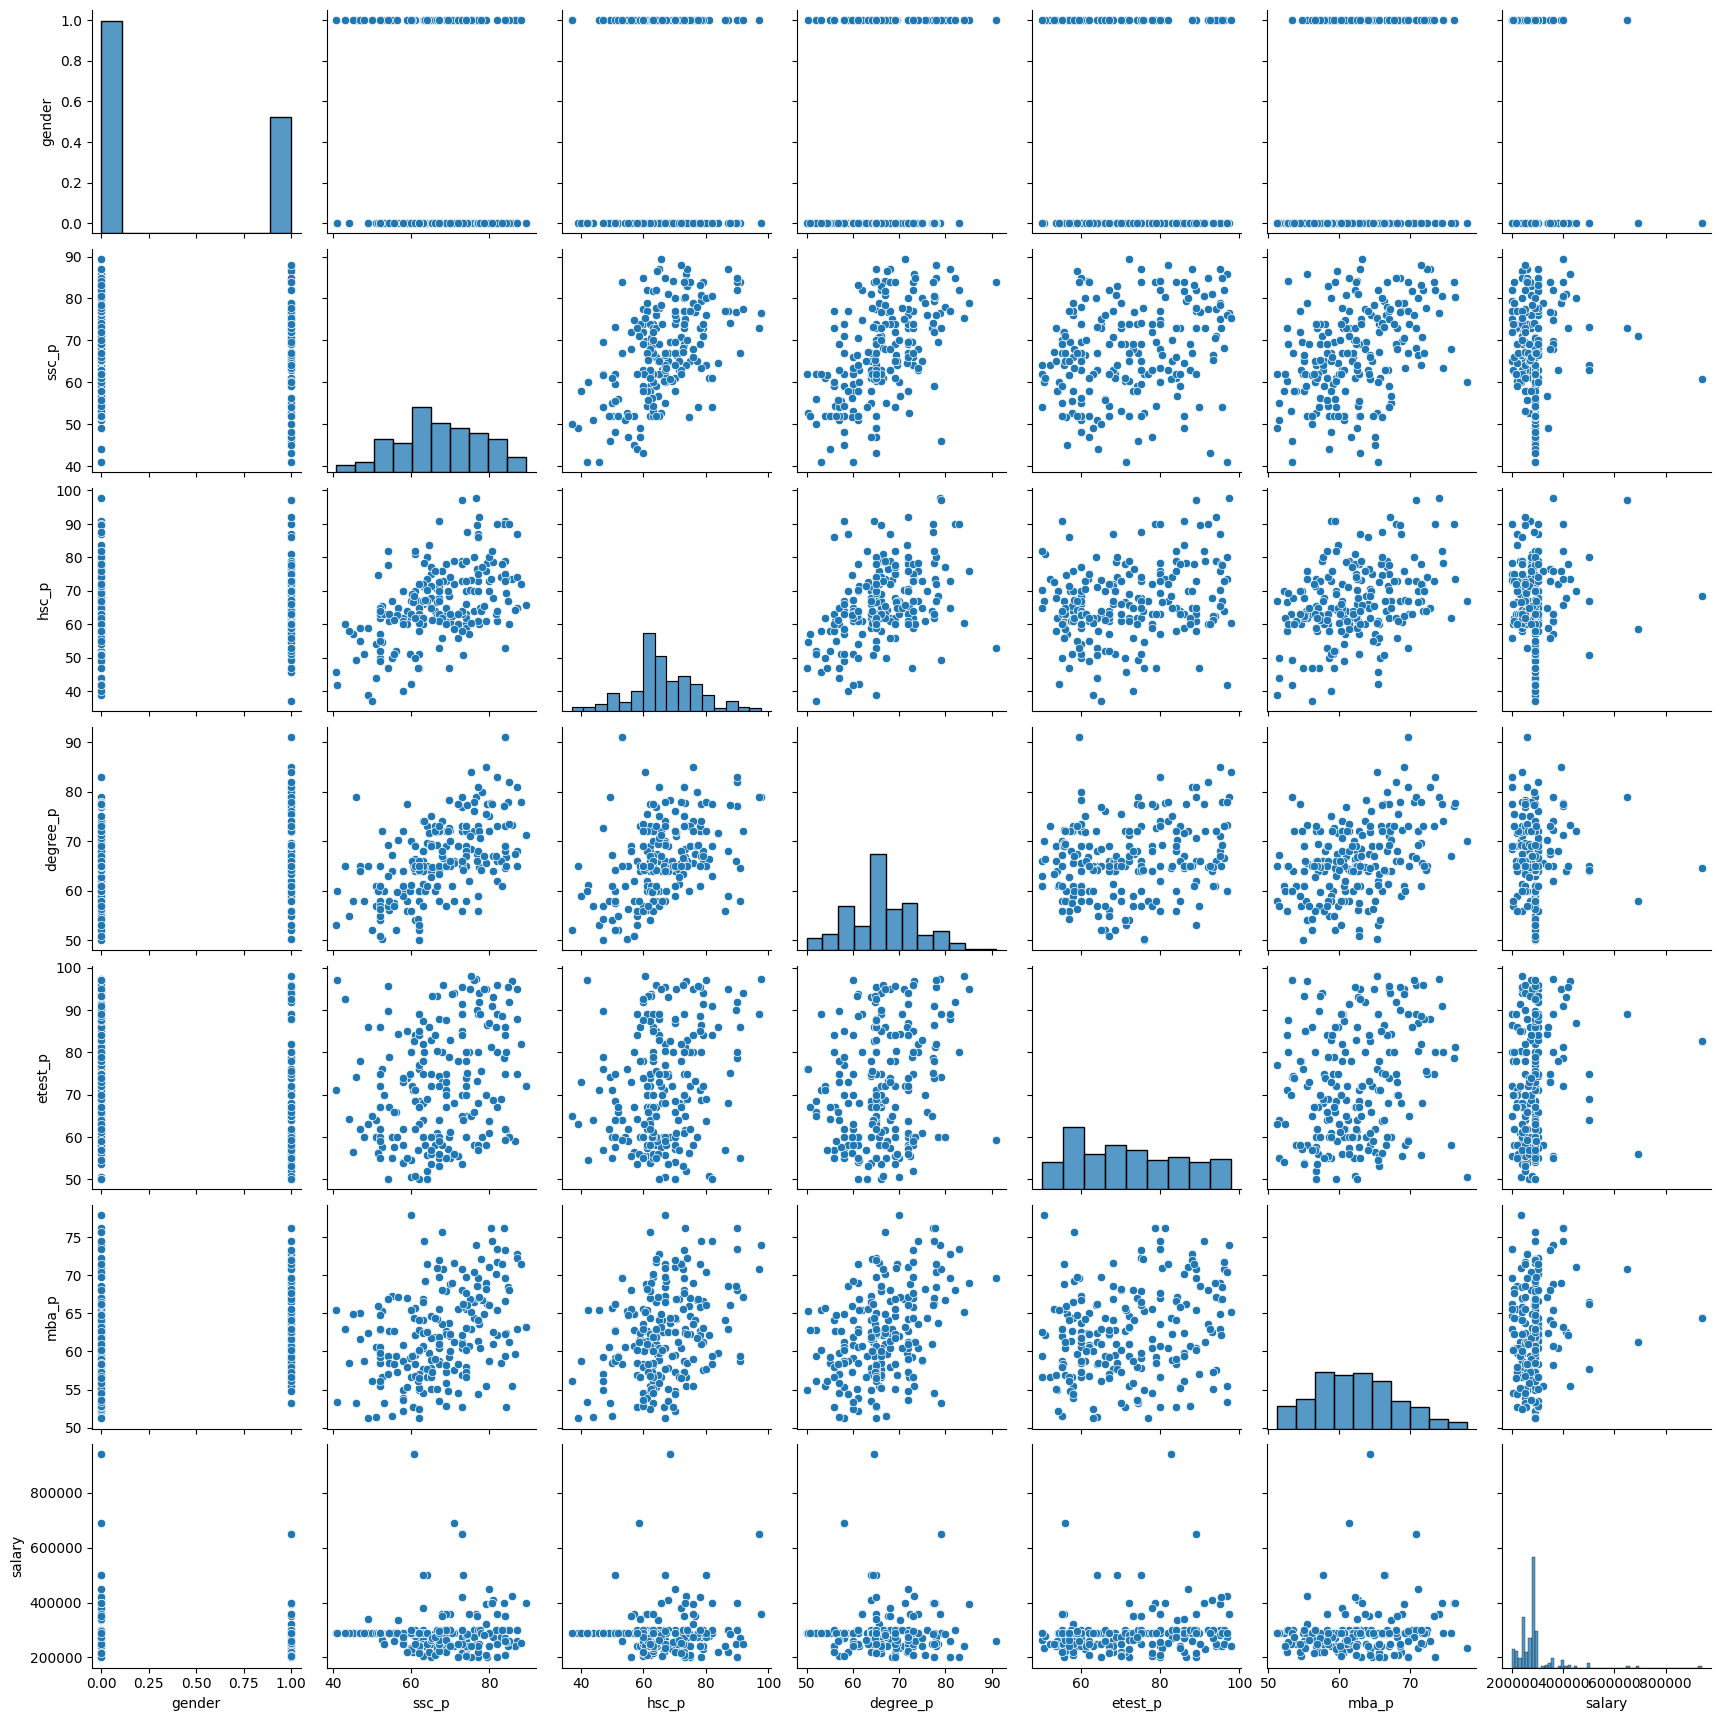

In [20]:
#pair plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, vars=['gender', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary'])
plt.show()


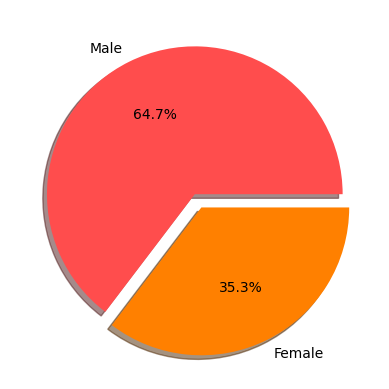

In [22]:
# show the percentage of male or female
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],
        explode=[0,0.1],autopct='%1.1f%%',shadow=True,
        colors=['#ff4d4d','#ff8000'])
plt.show()